In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 미션 1

정규분포의 두 파라미터(평균, 표준편차)가 분포 모양에 미치는 영향 이해

In [25]:
# 세 지역의 성인 남성 키 분포 (정규분포)
np.random.seed(42)

# A지역: 평균 175cm, 표준편차 5cm
region_a_heights = np.random.normal(175,5,1000)

# B지역: 평균 170cm, 표준편차 5cm (평균만 다름)
region_b_heights = np.random.normal(170, 5, 1000)

# C지역: 평균 175cm, 표준편차 8cm (표준편차만 다름)
region_c_heights = np.random.normal(175, 8, 1000)

height_data = pd.DataFrame({
    'region': ['A']*1000 + ['B']*1000 + ['C']*1000,
    'height': np.concatenate([region_a_heights, region_b_heights, region_c_heights])
})

print("📏 세 지역 성인 남성 키 데이터")
print(height_data.groupby('region')['height'].describe())

📏 세 지역 성인 남성 키 데이터
         count        mean       std         min         25%         50%  \
region                                                                     
A       1000.0  175.096660  4.896080  158.793663  171.762048  175.126503   
B       1000.0  170.354181  4.987272  155.298057  166.968792  170.315386   
C       1000.0  175.046674  7.867634  150.843903  169.816003  174.997994   

               75%         max  
region                          
A       178.239719  194.263657  
B       173.644411  185.965538  
C       180.287323  206.409902  


<Axes: xlabel='height', ylabel='Count'>

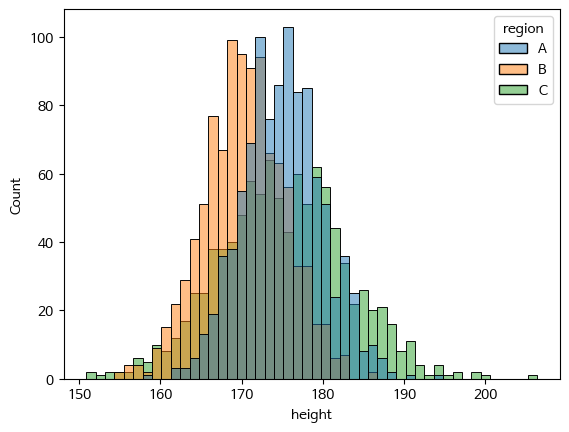

In [26]:
# 1. 세 지역의 키 분포를 하나의 그래프에 히스토그램으로 그리세요 (투명도 조정)
sns.histplot(x='height', hue='region', data=height_data, alpha=0.5)

평균: 분포의 중심 위치를 결정

표준편차: 분포의 퍼짐 정도 결정. 값이 작을수록 좁고 뾰족, 값이 클수록 넓고 완만한 모양

175.0966602791116 170.3541811862458 175.0466737164482
4.896079690898376 4.987271886137106 7.867634248816586


<Axes: >

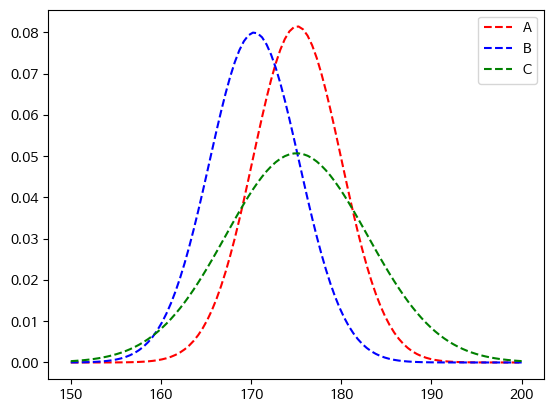

In [27]:
# 2. 각 지역의 이론적 정규분포 곡선을 함께 표시하세요.

mean_a,mean_b,mean_c = height_data.groupby('region')['height'].mean()
std_a, std_b, std_c = height_data.groupby('region')['height'].std()

print(mean_a,mean_b,mean_c)
print(std_a, std_b, std_c)

# np.linspace: 150부터 200까지를 100개 구간으로 균등하게 나눈 숫자 배열
# stats.norm.pdf: 정규분포의 확률 밀도 함수를 계산하는 함수
sns.lineplot(x=np.linspace(150, 200, 100), y=stats.norm.pdf(np.linspace(150, 200, 100), mean_a, std_a), color='red', label='A', linestyle='--')
sns.lineplot(x=np.linspace(150, 200, 100), y=stats.norm.pdf(np.linspace(150, 200, 100), mean_b, std_b), color='blue', label='B', linestyle='--')
sns.lineplot(x=np.linspace(150, 200, 100), y=stats.norm.pdf(np.linspace(150, 200, 100), mean_c, std_c), color='green', label='C', linestyle='--')

In [28]:
# 3. 68-95-99.7 규칙을 A지역 데이터로 검증해보세요: 평균 ± 1σ, 2σ, 3σ 범위에 포함되는 데이터 비율 계산

temp_a = height_data[height_data['region'] == 'A']

mean_a = temp_a['height'].mean()
std_a = temp_a['height'].std()

print(mean_a, std_a)

ratio_1sigma = len(temp_a[(temp_a['height'] >= (mean_a - std_a)) & (temp_a['height'] <= (mean_a + std_a))]) / len(temp_a)*100 # 68%
ratio_2sigma = len(temp_a[(temp_a['height'] >= (mean_a - 2*std_a)) & (temp_a['height'] <= (mean_a + 2*std_a))]) / len(temp_a)*100 # 95%
ratio_3sigma = len(temp_a[(temp_a['height'] >= (mean_a - 3*std_a)) & (temp_a['height'] <= (mean_a + 3*std_a))]) / len(temp_a)*100 # 99.7%

print(f'{ratio_1sigma:.2f}%')
print(f'{ratio_2sigma:.2f}%')
print(f'{ratio_3sigma:.2f}%')

175.0966602791116 4.89607969089838
68.60%
95.60%
99.70%


이론값: 약 68.27%, 약 95.45%, 약 99.73%

대부분의 데이터가 범위 내에 포함됨 -> 데이터가 정규분포를 따른다는 증거

In [29]:
# 4. 왜 A지역과 C지역은 평균이 같지만 분포 모양이 다른지 설명하세요

temp_c = height_data[height_data['region'] == 'C']

mean_c = temp_c['height'].mean()
std_c = temp_c['height'].std()

print(mean_c, std_c)

ratio_c1sigma = len(temp_c[(temp_c['height'] >= (mean_c - std_c)) & (temp_c['height'] <= (mean_c + std_c))]) / len(temp_c)*100 # 68%
ratio_c2sigma = len(temp_c[(temp_c['height'] >= (mean_c - 2*std_c)) & (temp_c['height'] <= (mean_c + 2*std_c))]) / len(temp_c)*100 # 95%
ratio_c3sigma = len(temp_c[(temp_c['height'] >= (mean_c - 3*std_c)) & (temp_c['height'] <= (mean_c + 3*std_c))]) / len(temp_c)*100 # 99.7%

print(f'{ratio_c1sigma:.2f}%')
print(f'{ratio_c2sigma:.2f}%')
print(f'{ratio_c3sigma:.2f}%')

# 평균이 같지만 분포 모양이 다른 이유는 표준편차가 다르기 때문이다.
# 표준편차가 클수록 분포가 넓어지고 작을수록 분포가 좁아진다.

175.0466737164482 7.867634248816589
69.60%
95.30%
99.50%


# 미션 2

z-값으로 서로 다른 분포 비교하기


In [30]:
# 시험 점수 데이터 생성
np.random.seed(123)

# 수학: 평균 75점, 표준편차 12점
math_scores = np.random.normal(75, 12, 1000)

# 영어: 평균 82점, 표준편차 8점
english_scores = np.random.normal(82, 8, 1000)

# 철수 학생의 점수
student_math = 87
student_english = 88

scores_data = pd.DataFrame({
    'subject': ['Math']*1000 + ['English']*1000,
    'score': np.concatenate([math_scores, english_scores])
})

print("📚 수학/영어 시험 점수 분포")
print(f"수학 - 평균: {math_scores.mean():.1f}, 표준편차: {math_scores.std():.1f}")
print(f"영어 - 평균: {english_scores.mean():.1f}, 표준편차: {english_scores.std():.1f}")
print(f"\n철수 학생 점수: 수학 {student_math}점, 영어 {student_english}점")

📚 수학/영어 시험 점수 분포
수학 - 평균: 74.5, 표준편차: 12.0
영어 - 평균: 82.1, 표준편차: 7.7

철수 학생 점수: 수학 87점, 영어 88점


<Axes: xlabel='score', ylabel='Count'>

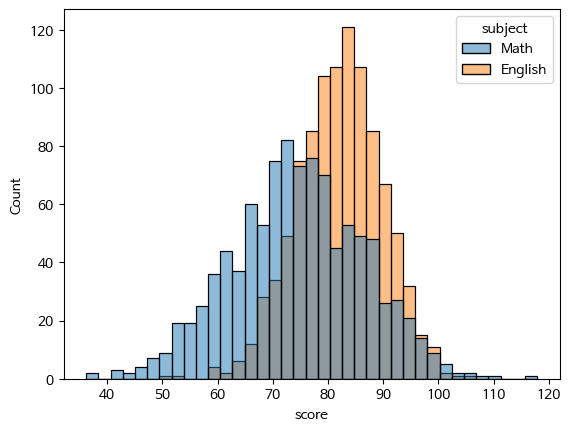

In [31]:
# 1. 수학과 영어 점수 분포를 나란히 비교하는 히스토그램을 그리세요
# hue: 컬럼의 **범주(카테고리)**에 따라 다른 색상으로 히스토그램을 나눠서 표시
sns.histplot(data=scores_data, x='score', hue='subject')

In [32]:
# 2. 철수 학생의 수학/영어 점수를 각각 z값으로 표준화하세요

# 수학 점수 표준화
math_z_score = (87 - math_scores.mean()) / math_scores.std()
print(f"수학 점수 z값: {math_z_score:.2f}")

# 영어 점수 표준화
english_z_score = (88 - english_scores.mean()) / english_scores.std()
print(f"영어 점수 z값: {english_z_score:.2f}")

수학 점수 z값: 1.04
영어 점수 z값: 0.77


z값은 **표준 점수(z-score)**라고 불리는 것으로, 각각의 점수가 전체 평균에서 얼마나 떨어져 있는지를 표준편차 단위로 나타낸 값

87점이 수학 평균보다 1.04표준편차만큼 높다

88점이 영어 평균보다 0.77표준편차만큼 높다

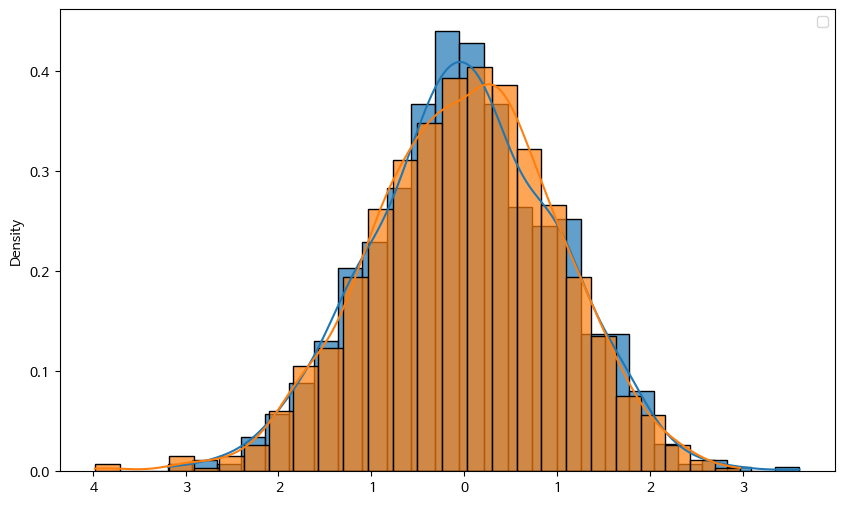

In [33]:
# 3. 표준정규분포 N(0,1)에서 해당 z값들이 어느 위치에 있는지 시각화하세요
z_values_math = (math_scores - math_scores.mean()) / math_scores.std()
z_values_english = (english_scores - english_scores.mean()) / english_scores.std()

plt.figure(figsize=(10, 6))
sns.histplot(z_values_math, kde=True, stat='density', alpha=0.7)
sns.histplot(z_values_english, kde=True, stat='density', alpha=0.7)
plt.legend()
plt.show()

# 표준화를 하면 서로 다른 과목도 동일한 척도(z-score 기준)에서 비교가 가능

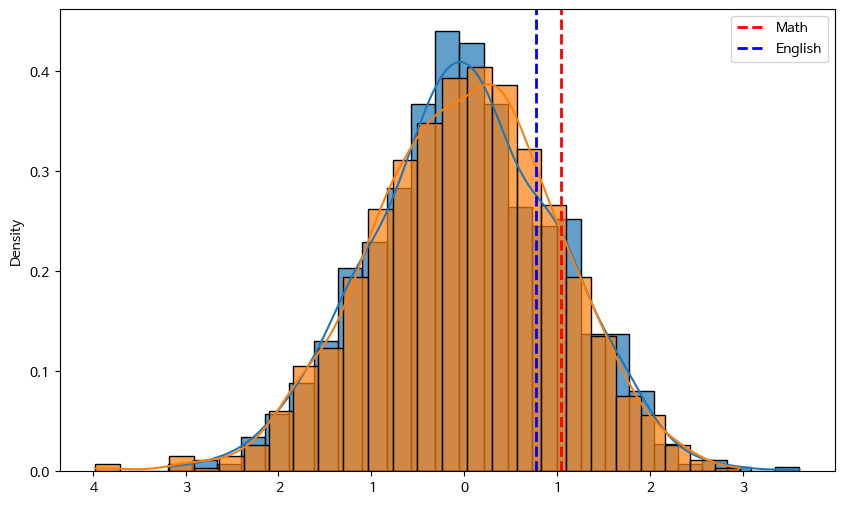

In [34]:
# 4. 이 학생이 수학과 영어 중 어느 과목에서 상대적으로 더 잘했는지 판단하세요
plt.figure(figsize=(10, 6))
sns.histplot(z_values_math, kde=True, stat='density', alpha=0.7)
sns.histplot(z_values_english, kde=True, stat='density', alpha=0.7)
plt.axvline(x=math_z_score, color='red', linestyle='--', linewidth=2,
                label='Math')
plt.axvline(x=english_z_score, color='blue', linestyle='--', linewidth=2, label='English')
plt.legend()
plt.show()

# 두 점선은 모두 오른쪽에 위치 -> 두 과목 모두 평균보다 높은 점수
# 수학이 영어보다 상대적으로 높은 위치에 있음
# 즉, 같은 점수대여도 수학에서 더 우수한 성과를 거둠

# 미션 3

중심극한정리 체험하기 (표본평균의 기적)

지수분포
- 사건이 어떤 시간 간격을 두고 발생할 확률을 모델링할 때 사용
- 예: 고객이 들어올 때까지의 시간, 전구가 고장 날 때까지 걸리는 시간 등
- 한쪽으로 길게 늘어진, 매우 치우친(비대칭) 분포

In [39]:
# 모집단: 지수분포 (매우 치우친 분포)
np.random.seed(456)

# 모집단 파라미터
# 지수분포의 모수 λ (람다)
# λ는 단위 시간당 사건 발생률
population_lambda = 0.1 # 지수분포의 모수
population_mean = 1/population_lambda  # 이론적 평균 = 10
population_std = 1/population_lambda   # 이론적 표준편차 = 10

print("📊 모집단 정보 (지수분포)")
print(f"이론적 평균: {population_mean}")
print(f"이론적 표준편차: {population_std}")

# 모집단에서 표본 하나 생성 (분포 확인용)
population_sample = np.random.exponential(1/population_lambda, 10000)

print(f"실제 모집단 표본 평균: {population_sample.mean():.2f}")
print(f"실제 모집단 표본 표준편차: {population_sample.std():.2f}")

# 평균, 표준편차가 이론값과 근접하는지 확인
# 시뮬레이션 모집단이 지수분포 이론에 잘 따르고 있음을 알 수 있다.

📊 모집단 정보 (지수분포)
이론적 평균: 10.0
이론적 표준편차: 10.0
실제 모집단 표본 평균: 9.91
실제 모집단 표본 표준편차: 9.89


<Axes: ylabel='Count'>

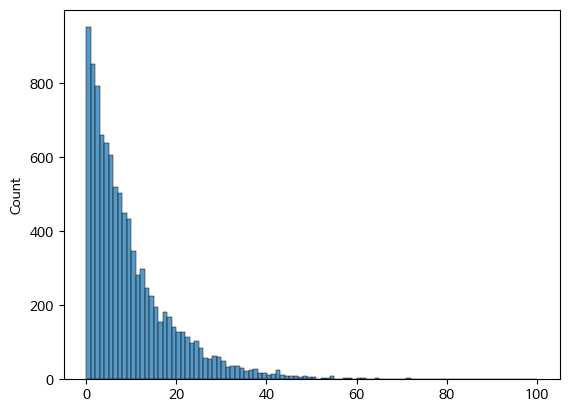

In [40]:
# 1. 모집단(지수분포)의 히스토그램을 그려서 치우친 분포임을 확인하세요
sns.histplot(data = population_sample)

분포 모양: 매우 비대칭 -> 전형적인 지수분포의 모양

이 분포의 이론적 평균은 10. 즉, 평균보다 작은 값이 훨씬 더 많이 나타난다는 특징이 있음

이것이 지수분포의 특성. 중심은 크지만 데이터는 대부분 작음

<Axes: ylabel='Count'>

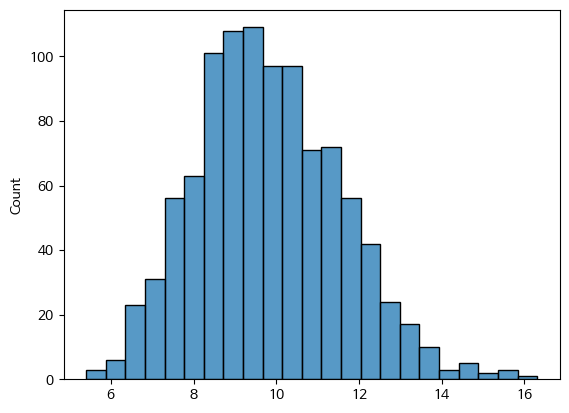

In [41]:
# 2. 다음 과정을 수행하세요:
#     - 표본크기 n=30으로 1000번 표본추출
#     - 각 표본의 평균을 계산하여 저장
#     - 1000개 표본평균들의 히스토그램을 그리세요

# 중심극한정리를 실험하는 과정
# 중심극한정리: 원래 모집단이 어떤 분포이든지 간에, 표본의 크기(n)가 충분히 크면, 표본 평균들의 분포는 정규분포에 가까워진다

sample_means = []
for i in range(1000):
  sample = np.random.choice(population_sample, size=30, replace=True)
  sample_means.append(sample.mean())

sns.histplot(sample_means)

# 대칭적인 종 모양의 분포가 나타

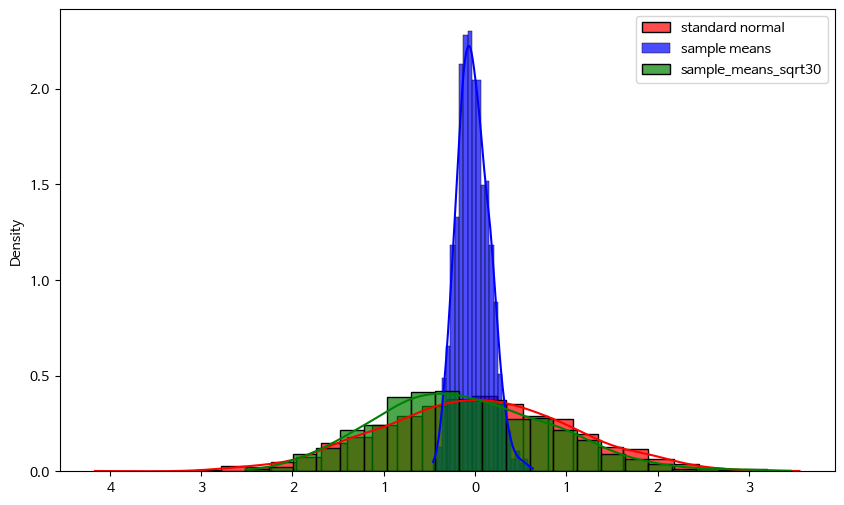

In [43]:
# 3. 표본평균들의 분포가 정규분포에 가까운지 확인하세요.
#     - 평균이 모집단 평균과 비슷한가?
#     - 표준편차가 이론값 σ/√n과 비슷한가?

# 중심극한정리 실험의 검증 단계
standard_normal = np.random.normal(0,1,1000)
z_values = (np.array(sample_means) - population_mean) / population_std # 잘못된 정규화
z_values_sqrt30 = (np.array(sample_means) - population_mean) / (population_std / np.sqrt(30)) # 올바른 정규화

plt.figure(figsize=(10, 6))
sns.histplot(data = standard_normal, kde=True, stat='density', alpha=0.7, color='red', label='standard normal')
sns.histplot(data = z_values, kde=True, stat='density', alpha=0.7, color='blue', label='sample means')
sns.histplot(data = z_values_sqrt30, kde=True, stat='density', alpha=0.7, color='green', label='sample_means_sqrt30')
plt.legend()
plt.show()

- standard normal: 우리가 모든 표본평균 분포가 수렴하길 기대하는 이론적인 종 모양

- sample means: 잘못된 정규화

- sample_means_sqrt30: 빨간색 기준 정규분포와 거의 일치,  중심극한정리가 실제로 잘 작동했다는 명확한 증거

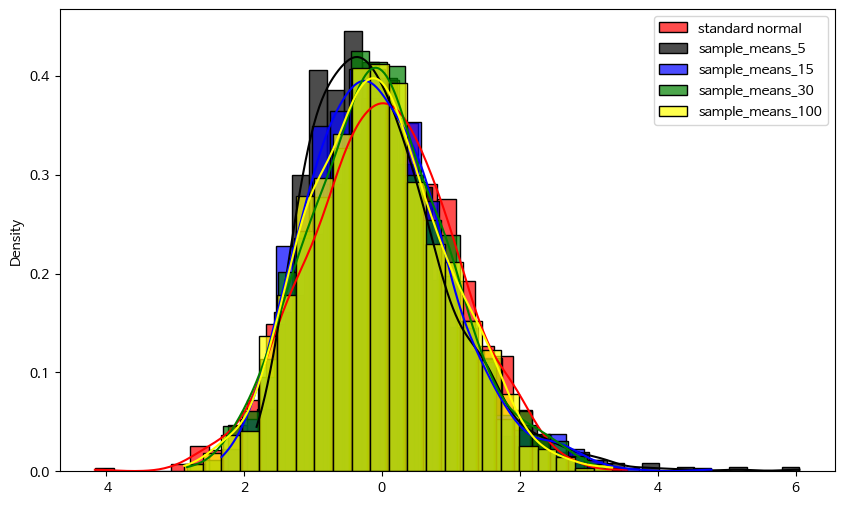

In [44]:
# 표본크기를 n=5, 15, 30, 100으로 바꿔가며 표본평균 분포의 변화를 관찰하세요

sample_means_5 = []
sample_means_15 = []
sample_means_30 = []
sample_means_100 = []

for i in range(1000):
    sample_means_5.append(np.random.choice(population_sample, size=5, replace=True).mean())
    sample_means_15.append(np.random.choice(population_sample, size=15, replace=True).mean())
    sample_means_30.append(np.random.choice(population_sample, size=30, replace=True).mean())
    sample_means_100.append(np.random.choice(population_sample, size=100, replace=True).mean())


z_values_5 = (np.array(sample_means_5) - population_mean) / (population_std / np.sqrt(5))
z_values_15 = (np.array(sample_means_15) - population_mean) / (population_std / np.sqrt(15))
z_values_30 = (np.array(sample_means_30) - population_mean) / (population_std / np.sqrt(30))
z_values_100 = (np.array(sample_means_100) - population_mean) / (population_std / np.sqrt(100))

plt.figure(figsize=(10, 6))
sns.histplot(data = standard_normal, kde=True, stat='density', alpha=0.7, color='red', label='standard normal')
sns.histplot(data = z_values_5, kde=True, stat='density', alpha=0.7, color='black', label='sample_means_5')
sns.histplot(data = z_values_15, kde=True, stat='density', alpha=0.7, color='blue', label='sample_means_15')
sns.histplot(data = z_values_30, kde=True, stat='density', alpha=0.7, color='green', label='sample_means_30')
sns.histplot(data = z_values_100, kde=True, stat='density', alpha=0.7, color='yellow', label='sample_means_100')
plt.legend()
plt.show()

# 미션 4

In [45]:
# 다이어트 프로그램 참가자들의 체중 감량량 (kg)
np.random.seed(101)

# 실제로는 평균 3.5kg 감량 효과가 있다고 가정
n_participants = 25
true_effect = 3.5
weight_loss = np.random.normal(true_effect, 2.1, n_participants)

diet_data = pd.DataFrame({
    'participant_id': range(1, n_participants+1),
    'weight_loss_kg': weight_loss
})

print("🏃‍♀️ 다이어트 프로그램 체중 감량 데이터")
print(f"참가자 수: {n_participants}명")
print(diet_data.describe())

# 기본 통계량 계산
sample_mean = weight_loss.mean()
sample_std = weight_loss.std(ddof=1)  # 표본 표준편차 (n-1로 나눔)
standard_error = sample_std / np.sqrt(n_participants)

print(f"\n표본 평균: {sample_mean:.2f}kg")
print(f"표본 표준편차: {sample_std:.2f}kg")
print(f"표준오차: {standard_error:.2f}kg")

🏃‍♀️ 다이어트 프로그램 체중 감량 데이터
참가자 수: 25명
       participant_id  weight_loss_kg
count       25.000000       25.000000
mean        13.000000        4.122041
std          7.359801        2.510631
min          1.000000       -0.738153
25%          7.000000        2.263099
50%         13.000000        4.558034
75%         19.000000        5.054256
max         25.000000        9.184385

표본 평균: 4.12kg
표본 표준편차: 2.51kg
표준오차: 0.50kg


1. 표본 표준편차
- 한 개의 표본 안에 있는 데이터들이 평균에서 얼마나 떨어져 있는지를 측정

2. 표준오차
- 표본평균이 모집단 평균을 얼마나 잘 추정하는지를 나타냄
- 표본평균이 얼마나 안정적인지를 보여줌

<Axes: ylabel='Density'>

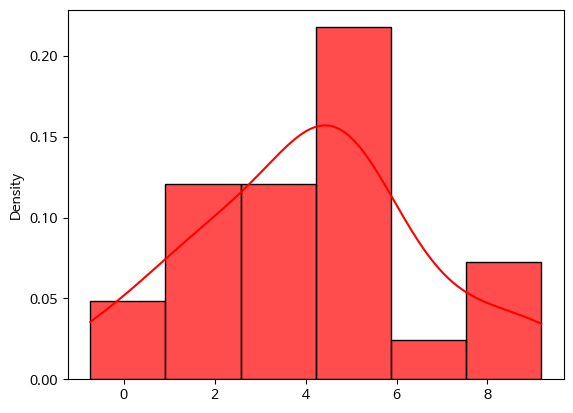

In [46]:
# 1. 체중 감량량의 히스토그램을 그리고 분포 모양을 확인하세요
sns.histplot(data = weight_loss, kde=True, stat='density', alpha=0.7, color='red')

In [48]:
# 2. 95% 신뢰구간을 직접 계산하세요:
  # - 자유도 (n-1) 계산
  # - t분포에서 95% 신뢰수준에 해당하는 t값 찾기 (`stats.t.ppf` 사용)
  # - 신뢰구간 = 표본평균 ± t값 × 표준오차

# 모집단의 평균 체중 감량이 어느 구간 안에 있을지, 95% 신뢰수준으로 추정하는 것

df = n_participants - 1
print(f"자유도 (degrees of freedom): {df}")

t_value = stats.t.ppf(0.975, df)
print(f"t값: {t_value}")

print(f'평균: {sample_mean}')
print(f"95% 신뢰구간: {sample_mean - t_value * standard_error} ~ {sample_mean + t_value * standard_error}")
# 모집단의 평균이 A에서 B 사이에 있을 확률이 95%입니다

자유도 (degrees of freedom): 24
t값: 2.0638985616280205
평균: 4.122040618359639
95% 신뢰구간: 3.0857032416770065 ~ 5.158377995042272


- 자유도

어떤 통계량(예: 평균, 분산)을 계산할 때 자유롭게 변할 수 있는 데이터의 개수를 의미
숫자 3개로 평균을 5로 만들라고 할 때 -> a와 b는 마음대로 정할 수 있지만, c는 반드시 15-a-b가 되어야 함

- t_value

t-분포에서 신뢰수준에 해당하는 경계값
우리가 95% 신뢰구간을 계산한다면, 양쪽 꼬리에 각 **2.5% (총 5%)**의 확률이 남아야 함. 따라서, 누적확률이 97.5%(=0.975)일 때의 t값이 우리가 찾는 t-value

In [49]:
# 90%, 95%, 99% 신뢰구간을 모두 계산하고 비교하세요


t_value_90 = stats.t.ppf(0.95, df)
t_value_95 = stats.t.ppf(0.975, df)
t_value_99 = stats.t.ppf(0.995, df)

print(f"90% 신뢰구간: {sample_mean - t_value_90 * standard_error} ~ {sample_mean + t_value_90 * standard_error}")
print(f"95% 신뢰구간: {sample_mean - t_value_95 * standard_error} ~ {sample_mean + t_value_95 * standard_error}")
print(f"99% 신뢰구간: {sample_mean - t_value_99 * standard_error} ~ {sample_mean + t_value_99 * standard_error}")

90% 신뢰구간: 3.2629620379142588 ~ 4.98111919880502
95% 신뢰구간: 3.0857032416770065 ~ 5.158377995042272
99% 신뢰구간: 2.7176242371447357 ~ 5.526456999574543


In [50]:
# scipy.stats의 t.interval() 함수로 같은 결과가 나오는지 검증하세요
# 직접 계산한 신뢰구간과 scipy 내장 함수로 구한 신뢰구간이 같은지를 확인

stats.t.interval(0.95, df, loc=sample_mean, scale=standard_error)

(np.float64(3.0857032416770065), np.float64(5.158377995042272))

# 미션 5

신뢰구간의 정밀도 개선하기 (표본크기의 영향)

In [51]:
# 배터리 수명 모집단 (실제 평균 500시간, 표준편차 80시간)
np.random.seed(202)

true_battery_life = 500  # 실제 평균 수명
true_battery_std = 80    # 실제 표준편차

print("🔋 배터리 수명 연구")
print(f"실제 평균 수명: {true_battery_life}시간")
print(f"실제 표준편차: {true_battery_std}시간")

# 다양한 표본크기로 실험
sample_sizes = [5, 10, 20, 50, 100, 200]

def calculate_confidence_interval(data, confidence_level=0.95):
    """신뢰구간 계산 함수"""
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    se = std / np.sqrt(n)

    # t분포의 임계값
    alpha = 1 - confidence_level
    t_critical = stats.t.ppf(1 - alpha/2, df=n-1)

    # 신뢰구간
    margin_error = t_critical * se
    ci_lower = mean - margin_error
    ci_upper = mean + margin_error

    return mean, ci_lower, ci_upper, margin_error

🔋 배터리 수명 연구
실제 평균 수명: 500시간
실제 표준편차: 80시간


In [52]:
# 각 표본크기별로 배터리 표본을 생성하고 95% 신뢰구간을 계산하세요
sample_means_list = []
for n in sample_sizes:
    sample = np.random.normal(true_battery_life, true_battery_std, n)
    mean, ci_lower, ci_upper, margin_error = calculate_confidence_interval(sample)
    print(f"표본크기: {n}, 평균: {mean:.2f}, 신뢰구간: {ci_lower:.2f} ~ {ci_upper:.2f}")

표본크기: 5, 평균: 454.17, 신뢰구간: 407.31 ~ 501.04
표본크기: 10, 평균: 517.74, 신뢰구간: 476.54 ~ 558.94
표본크기: 20, 평균: 481.90, 신뢰구간: 446.92 ~ 516.88
표본크기: 50, 평균: 507.34, 신뢰구간: 482.59 ~ 532.09
표본크기: 100, 평균: 484.58, 신뢰구간: 470.11 ~ 499.05
표본크기: 200, 평균: 498.02, 신뢰구간: 486.74 ~ 509.30


In [53]:
# 2. 표본크기별 신뢰구간을 시각화하세요:
# - x축: 표본크기
# - y축: 신뢰구간 (중앙값과 오차막대로 표시)
# - 실제 모집단 평균을 수평선으로 표시

results = []
for n in sample_sizes:
    sample = np.random.normal(true_battery_life, true_battery_std, n)
    mean, ci_lower, ci_upper, margin_error = calculate_confidence_interval(sample)
    results.append({
        'sample_size': n,
        'mean': mean,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'margin_error': margin_error
    })

df = pd.DataFrame(results)
df.head()

,sample_size,mean,ci_lower,ci_upper,margin_error
0,5,476.883304,411.232456,542.534153,65.650848
1,10,511.159002,450.834837,571.483166,60.324165
2,20,510.738361,462.518199,558.958523,48.220162
3,50,511.939641,489.400169,534.479113,22.539472
4,100,498.149682,482.735416,513.563948,15.414266


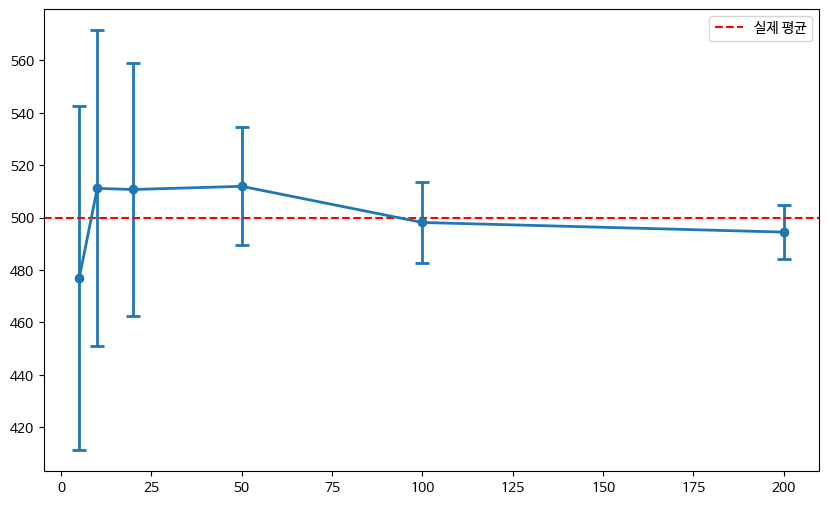

In [54]:
# 시각화
plt.figure(figsize=(10, 6))
plt.errorbar(df['sample_size'], df['mean'],
             yerr=df['margin_error'],
             marker='o', capsize=5, capthick=2, linewidth=2)
plt.axhline(y=true_battery_life, color='red', linestyle='--', label='실제 평균')
plt.legend()
plt.show()

1. 빨간색

- 실제 평균을 의미

2. 파란색

- x: 표본크기
- y: 평균 수명
- 막대가 길수록 불확실성(오차)가 큼
- 각 표본 평균에 대한 95% 신뢰구간

표본이 작을수록 신뢰구간이 매우 넓음. 표본 수가 적으니 추정이 불안정

표본이 클수록 신뢰구간이 매우 좁음. 추정 정확도가 향상됨

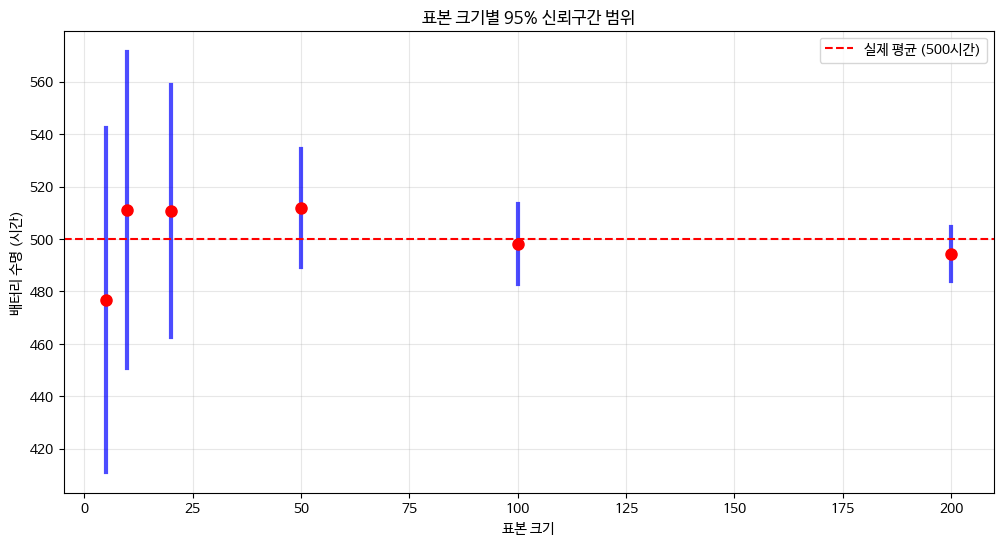

In [55]:
plt.figure(figsize=(12, 6))

# 신뢰구간을 막대로 표시

for i, row in df.iterrows():
    plt.plot([row['sample_size'], row['sample_size']],
             [row['ci_lower'], row['ci_upper']],
             'b-', linewidth=3, alpha=0.7)
    plt.plot(row['sample_size'], row['mean'], 'ro', markersize=8)

plt.axhline(y=true_battery_life, color='red', linestyle='--',
            label=f'실제 평균 ({true_battery_life}시간)')
plt.xlabel('표본 크기')
plt.ylabel('배터리 수명 (시간)')
plt.title('표본 크기별 95% 신뢰구간 범위')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

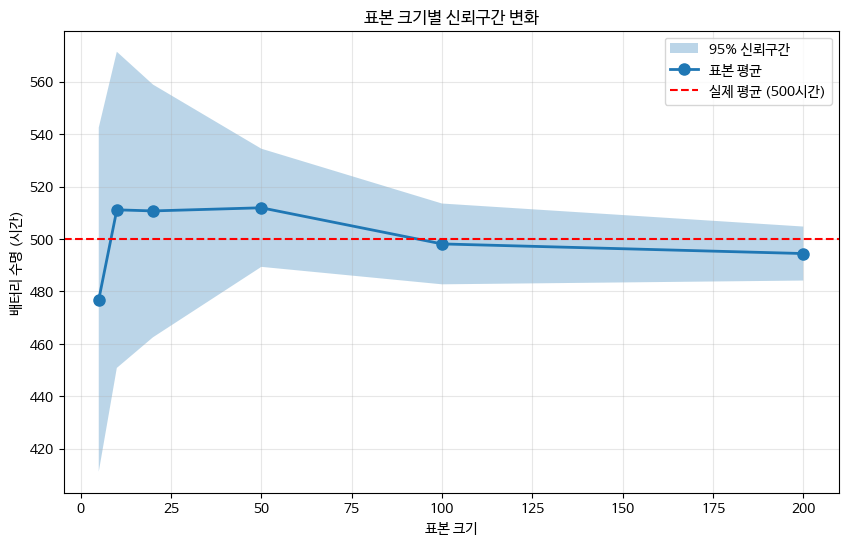

In [56]:
# 신뢰구간 상한/하한을 별도 열로 만들어 시각화
plt.figure(figsize=(10, 6))
plt.fill_between(df['sample_size'], df['ci_lower'], df['ci_upper'],
                 alpha=0.3, label='95% 신뢰구간')
plt.plot(df['sample_size'], df['mean'], 'o-', linewidth=2,
         markersize=8, label='표본 평균')
plt.axhline(y=true_battery_life, color='red', linestyle='--',
            label=f'실제 평균 ({true_battery_life}시간)')

plt.xlabel('표본 크기')
plt.ylabel('배터리 수명 (시간)')
plt.title('표본 크기별 신뢰구간 변화')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

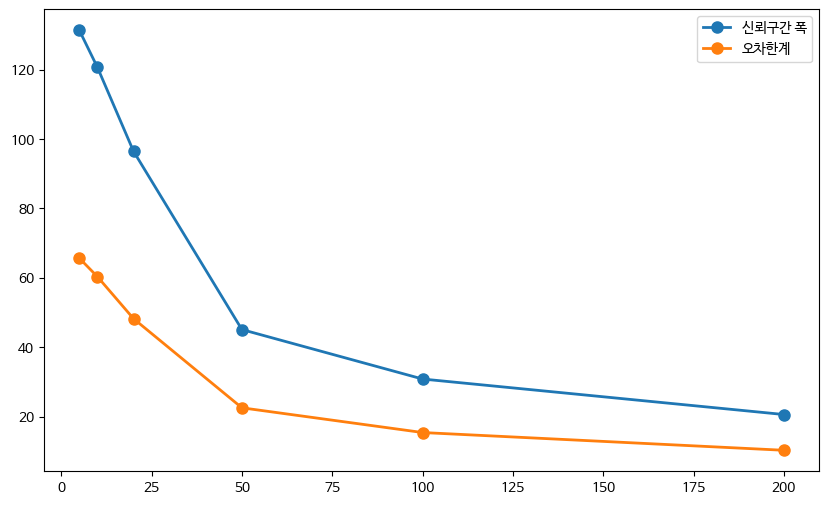

In [57]:
# 3. 다음을 계산하고 그래프로 표시하세요:
#     - 표본크기별 신뢰구간의 폭 (상한 - 하한)
#     - 표본크기별 오차한계 (margin of error)

width = df['ci_upper'] - df['ci_lower']
margin_of_error = df['margin_error']

plt.figure(figsize=(10, 6))
plt.plot(df['sample_size'], width, 'o-', linewidth=2, markersize=8, label='신뢰구간 폭')
plt.plot(df['sample_size'], margin_of_error, 'o-', linewidth=2, markersize=8, label='오차한계')
plt.legend()
plt.show()

# 표본 수가 늘어날수록 통계 추정이 얼마나 더 정밀해지는지 시각적으로 확인

# 미션 6

신뢰구간의 올바른 해석 (흔한 오해 바로잡기)

In [ ]:
# 모집단 설정 (대학생 평균 수면시간)
np.random.seed(303)

true_sleep_hours = 7.2  # 실제 평균 수면시간
true_sleep_std = 1.1    # 실제 표준편차
sample_size = 30        # 각 연구의 표본크기

print("😴 대학생 수면시간 연구 시뮬레이션")
print(f"실제 평균 수면시간: {true_sleep_hours}시간")
print(f"실제 표준편차: {true_sleep_std}시간")
print(f"각 연구의 표본크기: {sample_size}명")

confidence_intervals = []       # 각 연구의 신뢰구간 저장용
contains_true_mean = []         # 신뢰구간이 모평균 포함 여부 저장